# Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại

# 1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
### Gợi ý
- Lọc dữ liệu giới tính là nữ
- Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại
- Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS]
- Ox: thể hiện nhóm XL1, XL2 và XL3

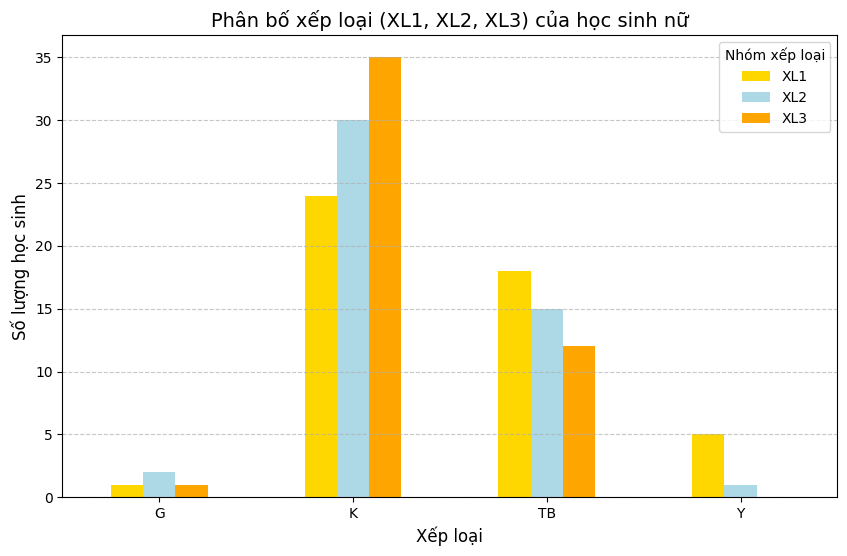

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df_female = df[df["GT"] == "F"]

grouped_XL1 = df_female["XL1"].value_counts().sort_index()
grouped_XL2 = df_female["XL2"].value_counts().sort_index()
grouped_XL3 = df_female["XL3"].value_counts().sort_index()

df_grouped = pd.DataFrame({"XL1": grouped_XL1, "XL2": grouped_XL2, "XL3": grouped_XL3}).fillna(0)

df_grouped.plot(kind="bar", figsize=(10, 6), color=["gold", "lightblue", "orange"])

plt.title("Phân bố xếp loại (XL1, XL2, XL3) của học sinh nữ", fontsize=14)
plt.xlabel("Xếp loại", fontsize=12)
plt.ylabel("Số lượng học sinh", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Nhóm xếp loại")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


# 2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2


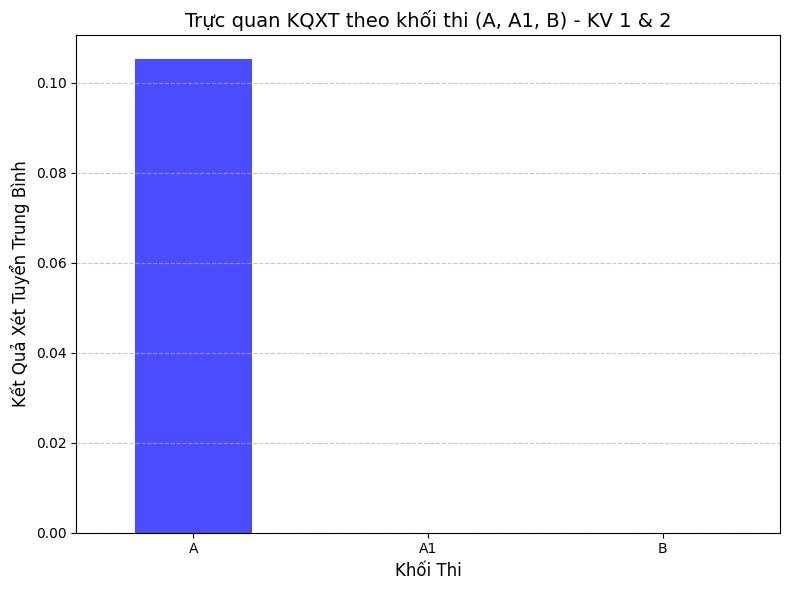

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["KV"] = df["KV"].replace({"1": 1, "2": 2})
df["KT"] = df["KT"].str.strip()

df_filtered = df[(df["KT"].isin(["A", "A1", "B"])) & (df["KV"].isin([1, 2]))]

if df_filtered.empty:
    print("Không có dữ liệu nào thỏa mãn điều kiện lọc.")
else:
    grouped_KQXT = df_filtered.groupby("KT")["KQXT"].mean()

    plt.figure(figsize=(8, 6))
    grouped_KQXT.plot(kind="bar", color=["blue", "orange", "green"], alpha=0.7)
    plt.title("Trực quan KQXT theo khối thi (A, A1, B) - KV 1 & 2", fontsize=14)
    plt.xlabel("Khối Thi", fontsize=12)
    plt.ylabel("Kết Quả Xét Tuyển Trung Bình", fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


# 3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi

<Figure size 1000x600 with 0 Axes>

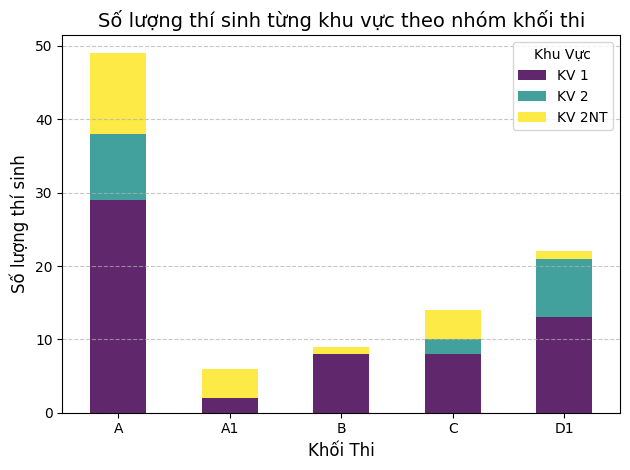

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["KV"] = df["KV"].replace({"1": 1, "2": 2})
df["KT"] = df["KT"].str.strip()

grouped_data = df.groupby(["KT", "KV"]).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)

plt.title("Số lượng thí sinh từng khu vực theo nhóm khối thi", fontsize=14)
plt.xlabel("Khối Thi", fontsize=12)
plt.ylabel("Số lượng thí sinh", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Khu Vực", labels=["KV 1", "KV 2", "KV 2NT"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi

<Figure size 1000x600 with 0 Axes>

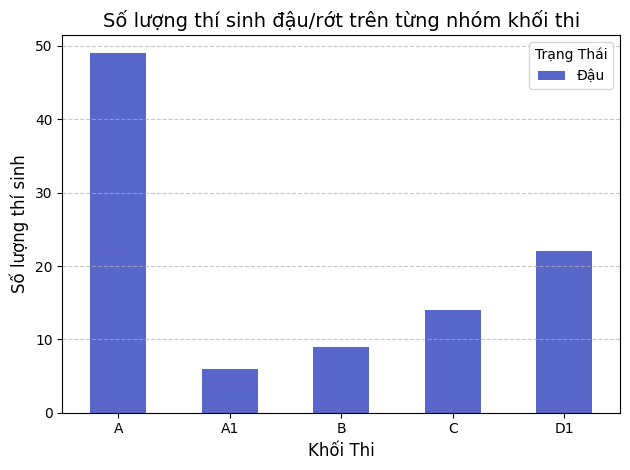

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["KT"] = df["KT"].str.strip()

df["TrangThai"] = df["KQXT"].apply(lambda x: "Đậu" if x >= 15 else "Rớt")

grouped_data = df.groupby(["KT", "TrangThai"]).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.85)

plt.title("Số lượng thí sinh đậu/rớt trên từng nhóm khối thi", fontsize=14)
plt.xlabel("Khối Thi", fontsize=12)
plt.ylabel("Số lượng thí sinh", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Trạng Thái", labels=["Đậu", "Rớt"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực

<Figure size 1000x600 with 0 Axes>

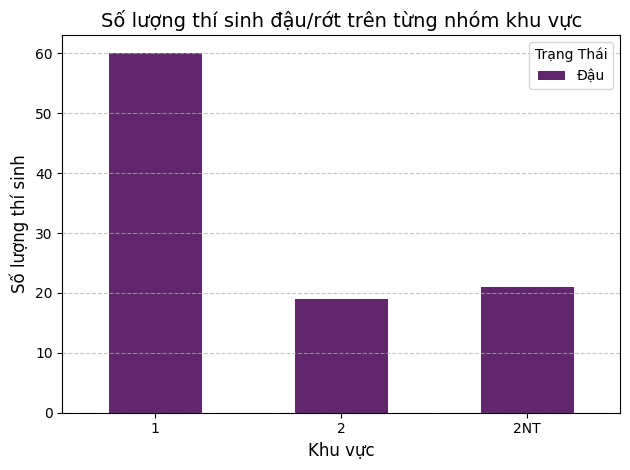

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["KV"] = df["KV"].astype(str).str.strip()

df["TrangThai"] = df["KQXT"].apply(lambda x: "Đậu" if x >= 15 else "Rớt")

grouped_data = df.groupby(["KV", "TrangThai"]).size().unst
plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, colormap="viridis", alpha=0.85)

plt.title("Số lượng thí sinh đậu/rớt trên từng nhóm khu vực", fontsize=14)
plt.xlabel("Khu vực", fontsize=12)
plt.ylabel("Số lượng thí sinh", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Trạng Thái", labels=["Đậu", "Rớt"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc

<Figure size 1000x600 with 0 Axes>

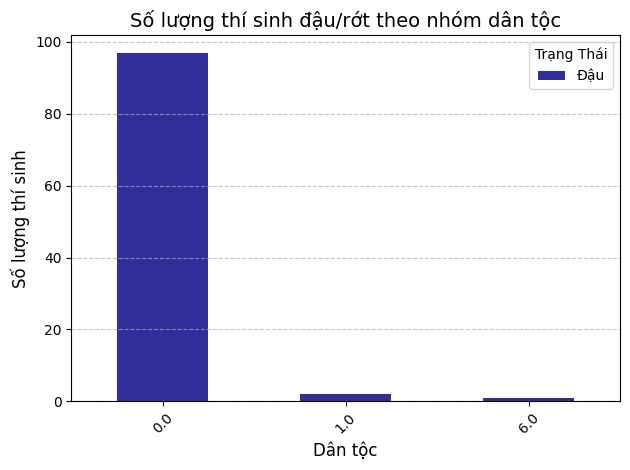

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["DT"] = df["DT"].astype(str).str.strip()
df["TrangThai"] = df["KQXT"].apply(lambda x: "Đậu" if x >= 15 else "Rớt")

grouped_data = df.groupby(["DT", "TrangThai"]).size().unstack()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind="bar", stacked=True, colormap="plasma", alpha=0.85)

plt.title("Số lượng thí sinh đậu/rớt theo nhóm dân tộc", fontsize=14)
plt.xlabel("Dân tộc", fontsize=12)
plt.ylabel("Số lượng thí sinh", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Trạng Thái", labels=["Đậu", "Rớt"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính.


<Figure size 800x500 with 0 Axes>

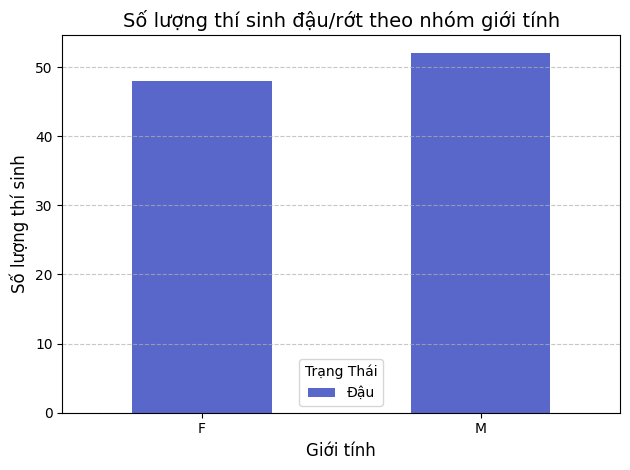

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "processed_dulieuxettuyendaihoc.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.columns = df.columns.str.strip()
df["GT"] = df["GT"].astype(str).str.strip()

df["TrangThai"] = df["KQXT"].apply(lambda x: "Đậu" if x >= 15 else "Rớt")

grouped_data = df.groupby(["GT", "TrangThai"]).size().unstack()

plt.figure(figsize=(8, 5))
grouped_data.plot(kind="bar", stacked=True, colormap="coolwarm", alpha=0.85)

plt.title("Số lượng thí sinh đậu/rớt theo nhóm giới tính", fontsize=14)
plt.xlabel("Giới tính", fontsize=12)
plt.ylabel("Số lượng thí sinh", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Trạng Thái", labels=["Đậu", "Rớt"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
